In [1]:
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('/home/fvbakel/anna_data/gadgetgridge/gadgetbridge-export.db')



In [2]:
sql = """
SELECT 
    "TIMESTAMP",datetime("TIMESTAMP",'unixepoch','localtime')       as DATE_TIME, 
    strftime('%H', datetime(timestamp, 'unixepoch','localtime'))    as H,
    strftime('%m', datetime(timestamp, 'unixepoch','localtime'))    as M,
    (LAG("HEART_RATE") OVER())                                      as PREVIOUS_HEART_RATE,
    ("TIMESTAMP"- LAG("TIMESTAMP") OVER())/60                       as TIME_DIFF,
    ("HEART_RATE"- LAG("HEART_RATE") OVER())                        as HEART_RATE_DIFF,
    HEART_RATE
FROM 
    MI_BAND_ACTIVITY_SAMPLE
WHERE 
        HEART_RATE <> 255 
    and HEART_RATE > 0 
order BY
    TIMESTAMP asc
;
"""

df = pd.read_sql_query(sql, cnx)
df.dropna(inplace=True)

In [3]:
df.head()

,TIMESTAMP,DATE_TIME,H,M,PREVIOUS_HEART_RATE,TIME_DIFF,HEART_RATE_DIFF,HEART_RATE
1,1681987440,2023-04-20 12:44:00,12,04,72.0,5.0,-12.0,60
2,1681987740,2023-04-20 12:49:00,12,04,60.0,5.0,38.0,98
3,1681988040,2023-04-20 12:54:00,12,04,98.0,5.0,22.0,120
4,1681988340,2023-04-20 12:59:00,12,04,120.0,5.0,-35.0,85
5,1681988640,2023-04-20 13:04:00,13,04,85.0,5.0,-17.0,68


In [4]:
df['HEART_RATE'].median(numeric_only=True,axis=0)

61.0

In [5]:
df[df['TIME_DIFF'] == 1]['HEART_RATE_DIFF'].agg(["min", "max", "median", "skew"])

min      -68.000000
max       69.000000
median     0.000000
skew       0.428786
Name: HEART_RATE_DIFF, dtype: float64

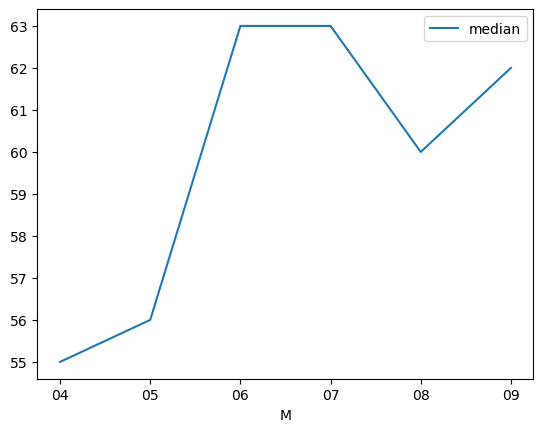

In [6]:
fig = df.groupby('M')['HEART_RATE'].agg(["median"]).plot()

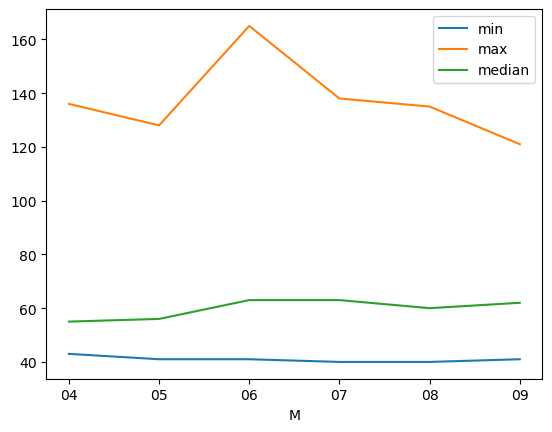

In [7]:
fig = df.groupby('M')['HEART_RATE'].agg(["min", "max", "median"]).plot()

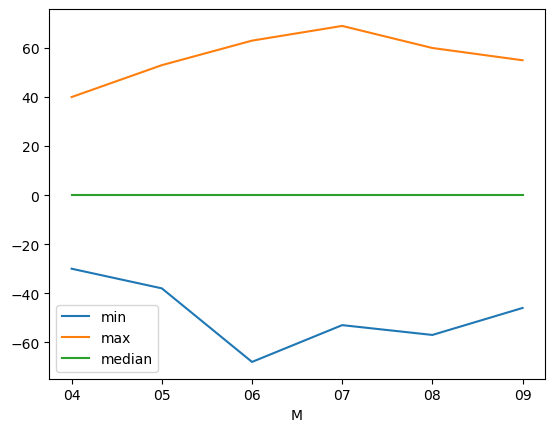

In [8]:
fig = df[(df['TIME_DIFF'] == 1)].groupby('M')['HEART_RATE_DIFF'].agg(["min", "max", "median"]).plot()

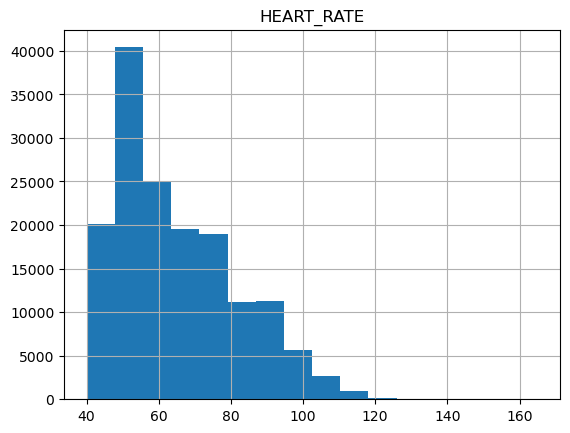

In [9]:
fig = df.hist('HEART_RATE',bins=16)

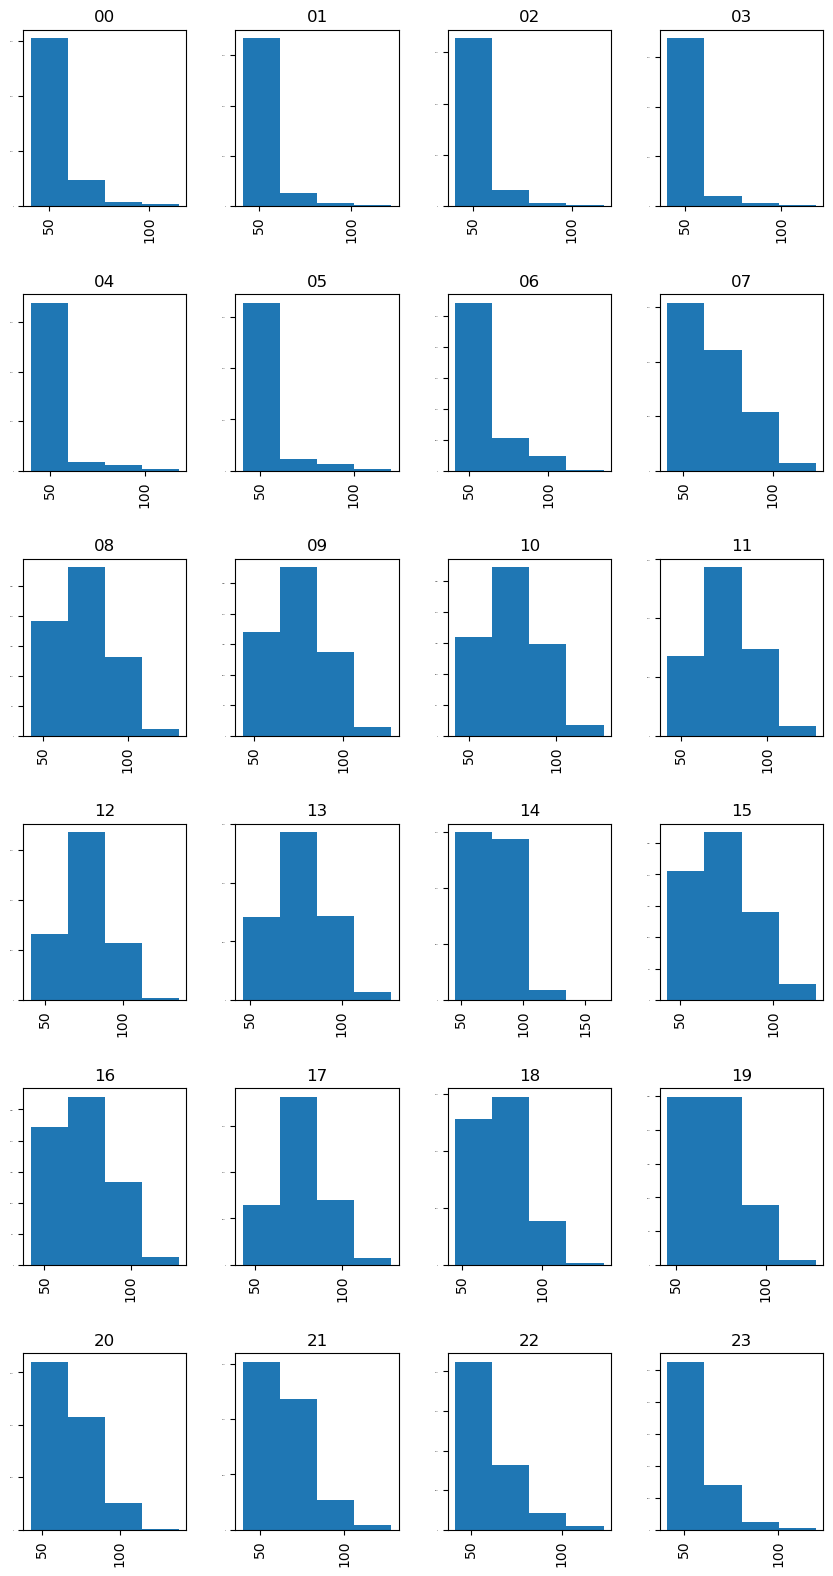

In [10]:
fig = df.hist('HEART_RATE',bins=4,by='H',ylabelsize=0,layout=(6,4),figsize=(10,20))

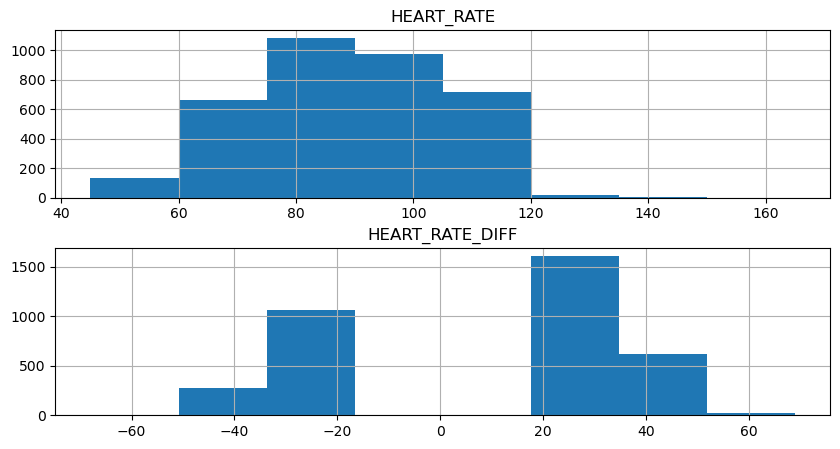

In [11]:
fig = df[(df['TIME_DIFF'] == 1) & (df['HEART_RATE_DIFF'].abs() > 25)].hist(['HEART_RATE','HEART_RATE_DIFF'],bins=8,layout=(2,1),figsize=(10,5))

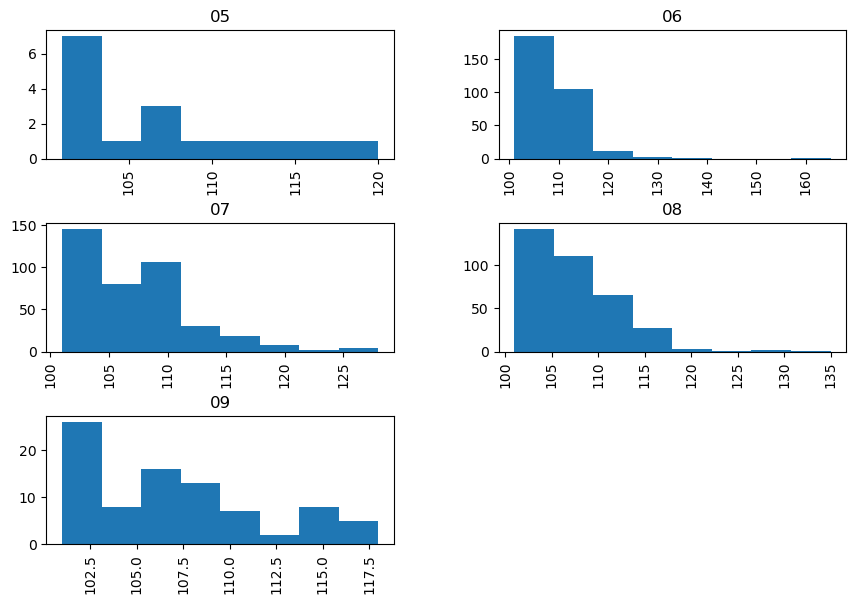

In [12]:
fig = df[(df['TIME_DIFF'] == 1) & (df['HEART_RATE_DIFF'] > 25) & (df['HEART_RATE'] > 100)].hist(['HEART_RATE'],bins=8,by='M',layout=(12,2),figsize=(10,30))

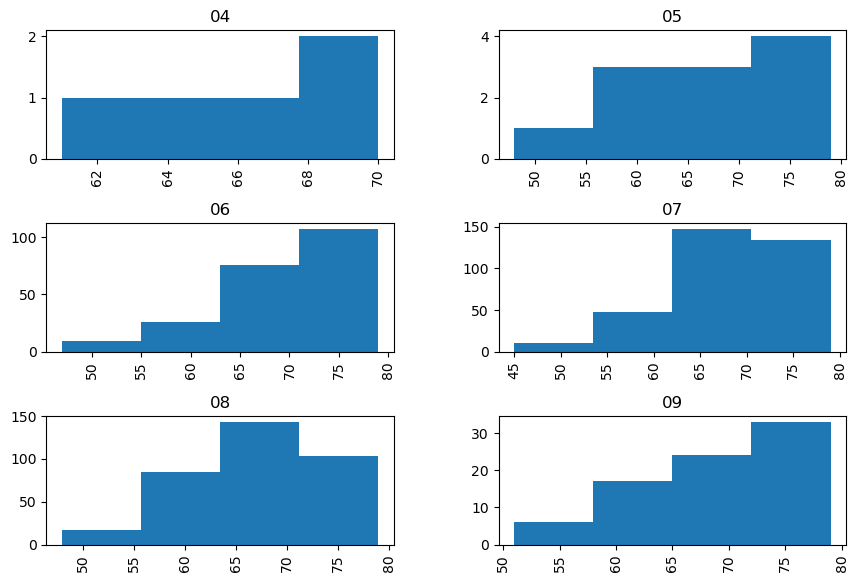

In [13]:
fig = df[(df['TIME_DIFF'] == 1) & (df['HEART_RATE_DIFF'] < -25) & (df['HEART_RATE'] < 80)].hist(['HEART_RATE'],bins=4,by='M',layout=(12,2),figsize=(10,30))

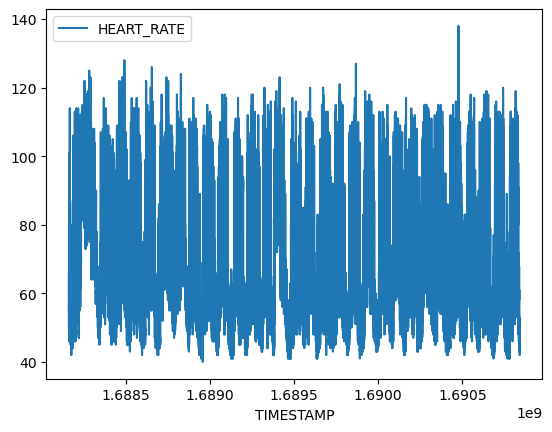

In [14]:
fig = df[df['M'] == '07'].plot(x='TIMESTAMP',y='HEART_RATE')

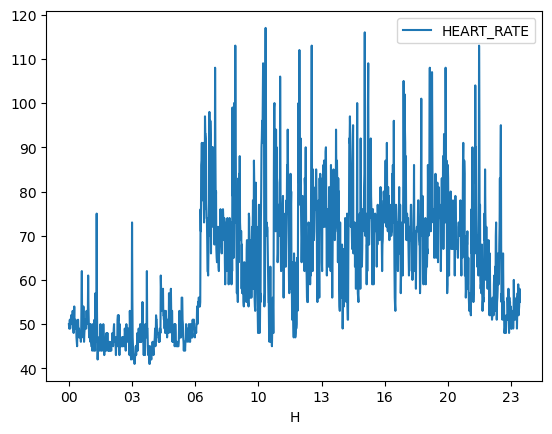

In [15]:
fig = df[df['DATE_TIME'].str.startswith('2023-08-30')].plot(x='H',y='HEART_RATE')

# Get a graph of one specific day

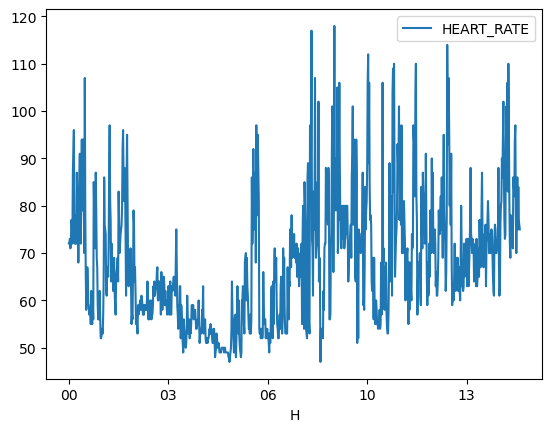

In [24]:
fig = df[df['DATE_TIME'].str.startswith('2023-09-09')].plot(x='H',y='HEART_RATE')

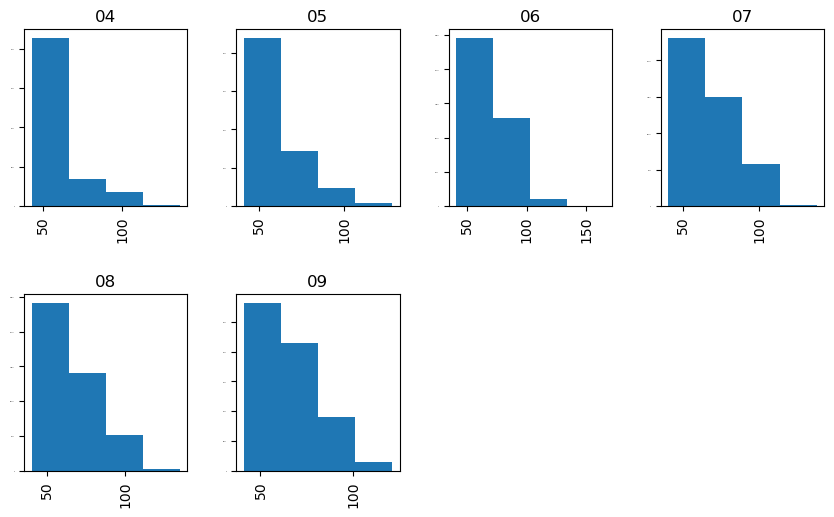

In [17]:
fig =  df.hist('HEART_RATE',bins=4,by='M',ylabelsize=0,layout=(6,4),figsize=(10,20))